# Predicting Long-Lived Bugs: Results for Paper

# 1. Python Packages e Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans

%matplotlib inline 

plt.style.use('default')
sns.set_context("paper")

In [2]:
def read_reports_file(data_file):
    results = pd.read_csv(data_file)
    rows_and_cols = results.shape
    print('Before filter: There are {} rows and {} columns.'.format(
        rows_and_cols[0], rows_and_cols[1]
        )
    )
    is_between_two_years = (results['days_to_resolve'] >= 0) & (results['days_to_resolve'] <= 730)
    results = results[is_between_two_years]
    
    rows_and_cols = results.shape
    print('After filter: There are {} rows and {} columns.'.format(
        rows_and_cols[0], rows_and_cols[1]
        )
    )
    return results

def read_metrics_file(metric_file):
    results_file = metric_file
    results = pd.read_csv(results_file)
    
    results.loc[results['dataset'] == 'eclipse', 'dataset'] = 'Eclipse'
    results.loc[results['dataset'] == 'freedesktop' , 'dataset'] = 'Freedesktop'
    results.loc[results['dataset'] == 'gnome' , 'dataset'] = 'Gnome'
    results.loc[results['dataset'] == 'mozilla', 'dataset'] = 'Mozilla'
    results.loc[results['dataset'] == 'netbeans' , 'dataset'] = 'Netbeans'
    results.loc[results['dataset'] == 'winehq', 'dataset'] = 'WineHQ'
    
    results.loc[results['classifier'] == 'knn', 'classifier'] = 'K-NN'
    results.loc[results['classifier'] == 'nb' , 'classifier'] = 'Naïve Bayes'
    results.loc[results['classifier'] == 'rf' , 'classifier'] = 'Random Forest'
    results.loc[results['classifier'] == 'svmRadial', 'classifier'] = 'SVM'
    
    results['acc_class_1'] = results.acc_class_1.fillna(0)
    results['balanced_acc'] = results.balanced_acc.fillna(results.acc_class_0 / 2)

    results.rename(columns={ 'dataset' : 'Project'
                            , 'n_term' :'Terms'
                            , 'classifier':'Classifier'
                            , 'threshold' : 'Bug_Fixing_Time'}, inplace=True)
    
    rows_and_cols = results.shape
    print('There are {} rows and {} columns.\n'.format(
        rows_and_cols[0], rows_and_cols[1]
        )
    )

    #results_information = results.info()

    return results.sort_values('Classifier', ascending=True)

def plot_line(project, data, x, y, h, c):
    sns.color_palette("bright")
    sns.set(font_scale=1)
    sns.set_style("ticks")
    sns.set_context("paper", rc={"font.size":10,"axes.titlesize":8,"axes.labelsize":10})
    g = sns.FacetGrid(data=data, hue=h, col=c)
    g = g.map(sns.lineplot, x, y)
    g.set(xlim=(4, 64))
    g.set(xticks=range(4, 64, 4))
    g.add_legend()
    plt.savefig('./figures/{}_{}_by_{}_line_plot_w_grided.pdf'.format(project.lower(), c, h), bbox_inches='tight') 
    return 

def plot_hist(data, project):
    #plt.figure(figsize=(5,5))
    sns.color_palette("bright")
    sns.set(font_scale=1)
    sns.set_style("ticks")
    sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
    median = data.median()
    percentile = np.percentile(data, 75)
    ax = sns.distplot(data, kde=False, color='black', bins=30)
    sns.despine()

    
    ax.set_ylabel("Number of bug reports")
    ax.set_xlabel("Bug fix time")
    ax.axvline(median, color='r', linestyle='--', label = "Median : {}".format(median))
    ax.axvline(percentile, color='b', linestyle='--', label = "3rd Quartile : {}".format(percentile))
    plt.legend(fontsize='small', title_fontsize='40')
    plt.savefig('./figures/{}_days_to_resolve_histogram_w_grided.pdf'.format(project.lower()), bbox_inches='tight') 

# 2. Projects

This eighth experiment has used a dataset of bug reports extracted from Eclipse Bugzilla Tracking System. The protocol parameters and values employed in this experiment is shown in the following table:

| Project       | Period                   |No.Reports    | Days To Resolve  | No. Reports in Days |
| ------------- | ------------------------ |:-------------:| ----------------:| -------------------:|
| Eclipse       | 2001-10-10 to 2018-01-31 |  8438        |  0-730           |       7614          |
| Freedesktop   | 2003-01-09 to 2018-01-22 |  8271        |  0-730           |       7644          |
| Gnome         | 1999-02-18 to 2018-01-04 |  5680        |  0-730           |       4904          |
| Mozilla       | 1998-04-21 to 2014-04-22 |  2431        |  0-730           |       2163          |
| Netbeans      | 1999-02-11 to 2017-09-30 |  7441        |  0-730           |       6640          |
| WineHQ        | 2000-08-30 to 2019-02-26 |  8058        |  0-730           |       6185          |


## 2.1 Histograms

In [3]:
print('BUG REPORTS\n')
print('Project : {}'.format("Eclipse"))
reports_eclipse = read_reports_file('datasets/20190409_eclipse_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_eclipse['creation_date'].min(), reports_eclipse['creation_date'].max()))

print('Project : {}'.format("Freedesktop"))
reports_freedesktop = read_reports_file('datasets/20190409_freedesktop_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_freedesktop['creation_date'].min(), reports_freedesktop['creation_date'].max()))

print('Project : {}'.format("Gnome"))
reports_gnome = read_reports_file('datasets/20190409_gnome_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_gnome['creation_date'].min(), reports_gnome['creation_date'].max()))

print('Project : {}'.format("Mozilla"))
reports_mozilla = read_reports_file('datasets/20190409_mozilla_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_mozilla['creation_date'].min(), reports_mozilla['creation_date'].max()))

print('Project : {}'.format("Netbeans"))
reports_netbeans = read_reports_file('datasets/20190409_netbeans_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_netbeans['creation_date'].min(), reports_netbeans['creation_date'].max()))

print('Project : {}'.format("WineHQ"))
reports_winehq = read_reports_file('datasets/20190409_winehq_bug_report_data.csv')
print ('Creation date from {} to {}\n'.format(reports_winehq['creation_date'].min(), reports_winehq['creation_date'].max()))


BUG REPORTS

Project : Eclipse
Before filter: There are 8438 rows and 19 columns.
After filter: There are 7614 rows and 19 columns.
Creation date from 2001-10-10 to 2018-01-31

Project : Freedesktop
Before filter: There are 8271 rows and 19 columns.
After filter: There are 7644 rows and 19 columns.
Creation date from 2003-01-09 to 2018-01-22

Project : Gnome
Before filter: There are 5680 rows and 19 columns.
After filter: There are 4904 rows and 19 columns.
Creation date from 1999-02-18 to 2018-01-04

Project : Mozilla
Before filter: There are 2431 rows and 19 columns.
After filter: There are 2163 rows and 19 columns.
Creation date from 1998-04-21 to 2014-04-22

Project : Netbeans
Before filter: There are 7441 rows and 19 columns.
After filter: There are 6640 rows and 19 columns.
Creation date from 1999-02-11 to 2017-09-30

Project : WineHQ
Before filter: There are 8058 rows and 19 columns.
After filter: There are 6185 rows and 19 columns.
Creation date from 2000-08-30 to 2019-02-26



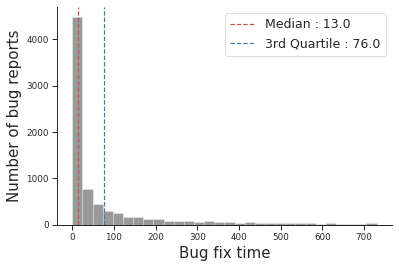

In [4]:
plot_hist(reports_eclipse['days_to_resolve'], "Eclipse")

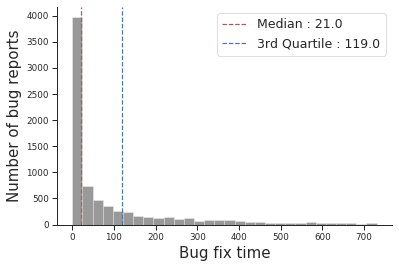

In [5]:
plot_hist(reports_freedesktop['days_to_resolve'], "Freedesktop")

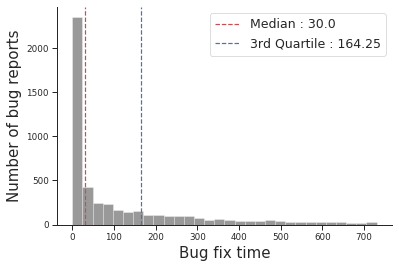

In [6]:
plot_hist(reports_gnome['days_to_resolve'], "Gnome")

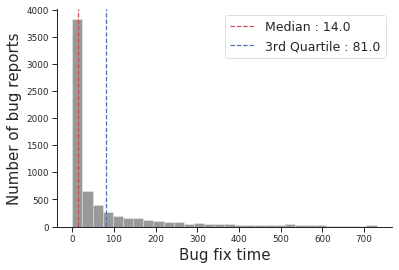

In [7]:
plot_hist(reports_netbeans['days_to_resolve'], "Netbeans")

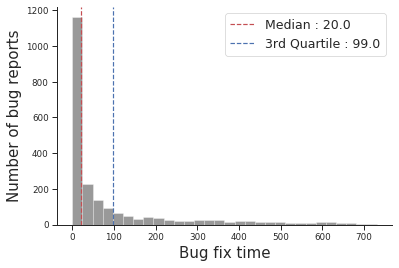

In [8]:
plot_hist(reports_mozilla['days_to_resolve'], "Mozilla")

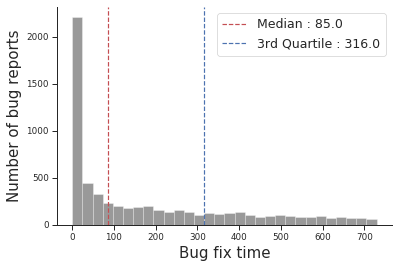

In [9]:
plot_hist(reports_winehq['days_to_resolve'], "WineHQ")

## 2.1  Evaluation Metrics

In [12]:
print('Project : {}\n'.format("Eclipse"))
results_eclipse = read_metrics_file('datasets/20190527114516_eclipse__result_metrics_normalized.csv')

print('\n\nProject : {}\n'.format("Freedesktop"))
results_freedesktop = read_metrics_file('datasets/20190527114516_freedesktop__result_metrics_normalized.csv')

print('\n\nProject : {}\n'.format("Gnome"))
results_gnome = read_metrics_file('datasets/20190605120009_gnome__result_metrics_normalized.csv')


print('\n\nProject : {}\n'.format("Mozilla"))
results_mozilla = read_metrics_file('datasets/20190605120009_mozilla__result_metrics_normalized.csv')


print('\n\nProject : {}\n'.format("Netbeans"))
results_netbeans = read_metrics_file('datasets/20190605120009_netbeans__result_metrics_normalized.csv')

print('\n\nProject : {}\n'.format("WineHQ"))
results_winehq = read_metrics_file('datasets/20190612124021_winehq__result_metrics_normalized.csv')


Project : Eclipse

There are 320 rows and 24 columns.



Project : Freedesktop

There are 320 rows and 24 columns.



Project : Gnome

There are 320 rows and 24 columns.



Project : Mozilla

There are 320 rows and 24 columns.



Project : Netbeans

There are 320 rows and 24 columns.



Project : WineHQ

There are 320 rows and 24 columns.



### 2.1.1 Balanced Accuracy by Classifier (RQ1)

In [13]:
print('Project : {}\n'.format("Eclipse"))
results_eclipse_grouped = results_eclipse.groupby(['Project', 'Classifier']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})
#print(results_eclipse_grouped)

print('\n\nProject : {}\n'.format("Freedesktop"))
results_freedesktop_grouped = results_freedesktop.groupby(['Project', 'Classifier']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})
#print(results_freedesktop_grouped)


print('\n\nProject : {}\n'.format("Gnome"))
results_gnome_grouped = results_gnome.groupby(['Project', 'Classifier']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})
#print(results_gnome_grouped)

print('\n\nProject : {}\n'.format("Mozilla"))
results_mozilla_grouped = results_mozilla.groupby(['Project', 'Classifier']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})
#print(results_mozilla_grouped)


print('\n\nProject : {}\n'.format("Netbeans"))
results_netbeans_grouped = results_netbeans.groupby(['Project', 'Classifier']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})
#print(results_netbeans_grouped)

print('\n\nProject : {}\n'.format("WineHQ"))
results_winehq_grouped = results_winehq.groupby(['Project', 'Classifier']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})
#print(results_winehq_grouped)

results_frames = [results_eclipse_grouped
                  , results_freedesktop_grouped
                  , results_gnome_grouped
                  , results_mozilla_grouped
                  , results_netbeans_grouped
                  , results_winehq_grouped]

results_grouped_final = pd.concat(results_frames)
print(results_grouped_final)
#print(results_grouped_final.to_latex())

Project : Eclipse



/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  




Project : Freedesktop



Project : Gnome



Project : Mozilla



Project : Netbeans



Project : WineHQ

                                Min       Max      Mean       Std
Project     Classifier                                           
Eclipse     K-NN           0.563362  0.721075  0.666481  0.038108
            Naïve Bayes    0.563913  0.860763  0.679516  0.051646
            Random Forest  0.330667  0.861035  0.545321  0.159479
            SVM            0.311300  0.860990  0.419184  0.136697
Freedesktop K-NN           0.465992  0.646266  0.585800  0.044339
            Naïve Bayes    0.467058  0.655812  0.594690  0.045679
            Random Forest  0.475068  0.662307  0.543346  0.034163
            SVM            0.315968  0.824784  0.483542  0.111162
Gnome       K-NN           0.427041  0.559158  0.500659  0.024406
            Naïve Bayes    0.429265  0.752346  0.575094  0.051971
            Random Forest  0.377514  0.513410  0.428888  0.028427
            SVM            0.339296

/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app
/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: using a dict on a Series for aggregatio

### 2.1.2 Balanced Accuracy by Classifier and N_Term (RQ2)

In [15]:

print('Project : {}\n'.format("Eclipse"))
results_eclipse_grouped = results_eclipse.loc[(results_eclipse['Classifier'] == 'K-NN') |  
                          (results_eclipse['Classifier'] == 'Naïve Bayes')].groupby(['Project', 'Classifier','Terms']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})

print('\n\nProject : {}\n'.format("Freedesktop"))
results_freedesktop_grouped = results_freedesktop.loc[(results_eclipse['Classifier'] == 'K-NN') |  
                          (results_eclipse['Classifier'] == 'Naïve Bayes')].groupby(['Project', 'Classifier','Terms']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})


print('\n\nProject : {}\n'.format("Gnome"))
results_gnome_grouped = results_gnome.loc[(results_eclipse['Classifier'] == 'K-NN') |  
                          (results_eclipse['Classifier'] == 'Naïve Bayes')].groupby(['Project', 'Classifier','Terms']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})


print('\n\nProject : {}\n'.format("Mozilla"))
results_mozilla_grouped = results_mozilla.loc[(results_eclipse['Classifier'] == 'K-NN') |  
                          (results_eclipse['Classifier'] == 'Naïve Bayes')].groupby(['Project', 'Classifier','Terms']).balanced_acc.agg({
    'Min' : 'min',
    'Max' : 'max',
    'Mean': 'mean',
    'Std' : 'std'
})


print('\n\nProject : {}\n'.format("Netbeans"))
results_netbeans_grouped = results_netbeans.loc[(results_eclipse['Classifier'] == 'K-NN') |  
                          (results_eclipse['Classifier'] == 'Naïve Bayes')].groupby(['Project', 'Classifier','Terms']).balanced_acc.agg({
    'Min': 'min',
    'Max': 'max',
    'Mean': 'mean',
    'Std': 'std'
})


#print('\n\nProject : {}\n'.format("WineHQ"))
#esults_winehq = read_metrics_file('datasets/20190420163802_netbeans__result_metrics.csv')
#esults_winehq['acc_class_1'] = results_netbeans.acc_class_1.fillna(0)
#results_winehq['balanced_acc'] = results_netbeans.balanced_acc.fillna(results_netbeans.acc_class_0 / 2)
#print(results_winehq['balanced_acc'].groupby(results_winehq['classifier']).agg({
#    'Min': 'min',
#    'Max': 'max',
#    'Mean': 'mean',
#    'Std': 'std'
#}))

all_results_metrics = pd.concat([results_eclipse
                      , results_freedesktop
                      , results_gnome
                      , results_mozilla
                      , results_netbeans
                      , results_winehq])

all_results_metrics_filtered = all_results_metrics.loc[(all_results_metrics['Classifier'] == 'K-NN') |  
                          (all_results_metrics['Classifier'] == 'Naïve Bayes')]



all_results_metrics_pivoted = pd.pivot_table(all_results_metrics_filtered
               , values  = ['balanced_acc']
               , index   = ['Project', 'Terms']
               , columns = ['Classifier']                              
               , aggfunc = {'balanced_acc': [min, max, np.mean, np.std]})

#all_results_metrics_pivoted.to_latex(multirow=True)


print(all_results_metrics_pivoted)


Project : Eclipse



Project : Freedesktop



Project : Gnome



Project : Mozilla



Project : Netbeans

                  balanced_acc                                              \
                           max                  mean                   min   
Classifier                K-NN Naïve Bayes      K-NN Naïve Bayes      K-NN   
Project     Terms                                                            
Eclipse     100       0.715413    0.762243  0.662512    0.686367  0.563362   
            200       0.709760    0.739653  0.667056    0.677432  0.567954   
            300       0.715537    0.731075  0.666729    0.671402  0.570514   
            400       0.715646    0.772858  0.668757    0.677754  0.572720   
            500       0.721075    0.860763  0.667352    0.684625  0.573611   
Freedesktop 100       0.637500    0.644501  0.585926    0.603204  0.478253   
            200       0.626542    0.655812  0.584730    0.593578  0.475801   
            300       0.646266    0.

/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/home/luiz/apps/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in 

### 2.1.3 Correlation Between Balanced Accuracy and N_Term

In [16]:
print('Project : {}\n'.format("Eclipse"))
print(results_eclipse.loc[(results_eclipse['Classifier'] == 'K-NN') |  
                          (results_eclipse['Classifier'] == 'Naïve Bayes')
                          , ['balanced_acc', 'Terms']].corr())

print('\n\nProject : {}\n'.format("Freedesktop"))
print(results_freedesktop.loc[(results_freedesktop['Classifier'] == 'K-NN') |  
                              (results_freedesktop['Classifier'] == 'Naïve Bayes')
                              , ['balanced_acc', 'Terms']].corr())

print('\n\nProject : {}\n'.format("Gnome"))
print(results_gnome.loc[(results_gnome['Classifier'] == 'K-NN') |  
                        (results_gnome['Classifier'] == 'Naïve Bayes')
                        , ['balanced_acc', 'Terms']].corr())
  
print('\n\nProject : {}\n'.format("Mozilla"))
print(results_mozilla.loc[(results_mozilla['Classifier'] == 'K-NN') |  
                          (results_mozilla['Classifier'] == 'Naïve Bayes')
                          , ['balanced_acc', 'Terms']].corr())

print('\n\nProject : {}\n'.format("Netbeans"))
print(results_netbeans.loc[(results_netbeans['Classifier'] == 'K-NN') |  
                           (results_netbeans['Classifier'] == 'Naïve Bayes')
                          , ['balanced_acc', 'Terms']].corr())


print('\n\nProject : {}\n'.format("WineHQ"))
print(results_winehq.loc[(results_winehq['Classifier'] == 'K-NN') |  
                           (results_winehq['Classifier'] == 'Naïve Bayes')
                          , ['balanced_acc', 'Terms']].corr())

#print('\n\nProject : {}\n'.format("WineHQ"))
#esults_winehq = read_metrics_file('datasets/20190420163802_netbeans__result_metrics.csv')
#esults_winehq['acc_class_1'] = results_netbeans.acc_class_1.fillna(0)
#results_winehq['balanced_acc'] = results_netbeans.balanced_acc.fillna(results_netbeans.acc_class_0 / 2)
#print(results_winehq['balanced_acc'].groupby(results_winehq['classifier']).agg({
#    'Min': 'min',
#    'Max': 'max',
#    'Mean': 'mean',
#    'Std': 'std'
#}))

Project : Eclipse

              balanced_acc     Terms
balanced_acc      1.000000  0.012755
Terms             0.012755  1.000000


Project : Freedesktop

              balanced_acc     Terms
balanced_acc      1.000000 -0.042321
Terms            -0.042321  1.000000


Project : Gnome

              balanced_acc     Terms
balanced_acc      1.000000  0.039752
Terms             0.039752  1.000000


Project : Mozilla

              balanced_acc     Terms
balanced_acc      1.000000  0.094927
Terms             0.094927  1.000000


Project : Netbeans

              balanced_acc     Terms
balanced_acc      1.000000 -0.053976
Terms            -0.053976  1.000000


Project : WineHQ

              balanced_acc     Terms
balanced_acc      1.000000 -0.091222
Terms            -0.091222  1.000000


# 3.1 Eclipse

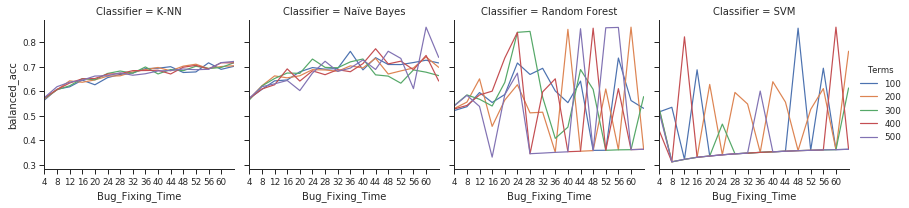

In [17]:
plot_line('eclipse', results_eclipse, 'Bug_Fixing_Time', 'balanced_acc', 'Terms', 'Classifier')

# 4. FreeDesktop

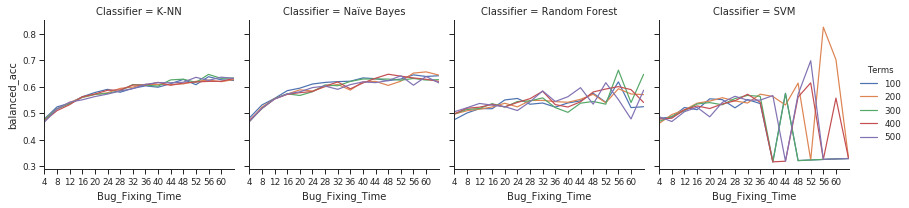

In [18]:
plot_line('freedesktop', results_freedesktop, 'Bug_Fixing_Time', 'balanced_acc',  'Terms', 'Classifier')

# 5. Gnome

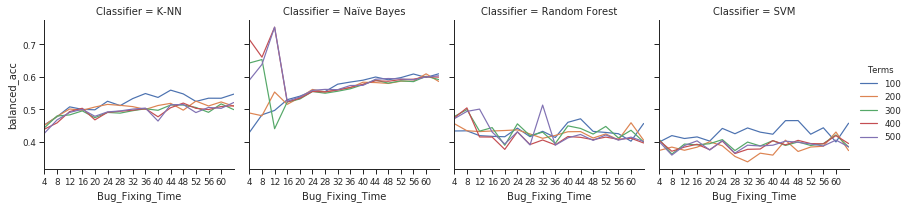

In [20]:
plot_line('gnome', results_gnome, 'Bug_Fixing_Time', 'balanced_acc', 'Terms', 'Classifier')

# 6. Mozilla

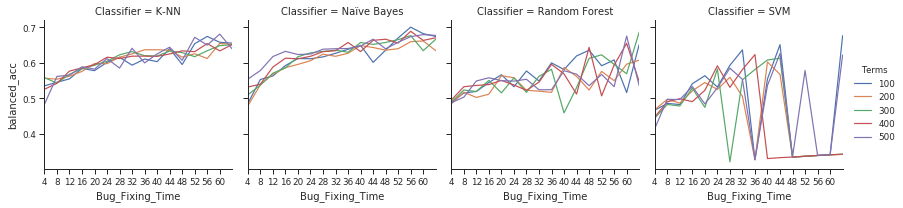

In [21]:
plot_line('mozilla', results_mozilla, 'Bug_Fixing_Time', 'balanced_acc', 'Terms', 'Classifier')

# 7. Netbeans

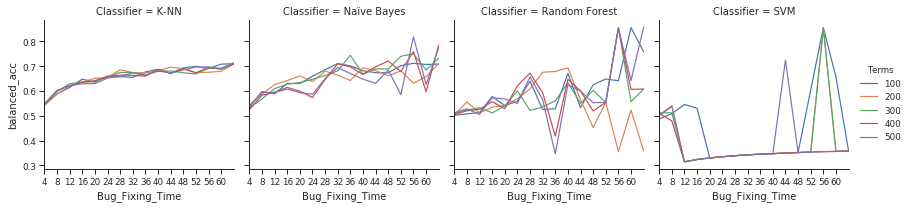

In [22]:
plot_line('netbeans', results_netbeans, 'Bug_Fixing_Time', 'balanced_acc', 'Terms', 'Classifier')

# 8. WineHQ

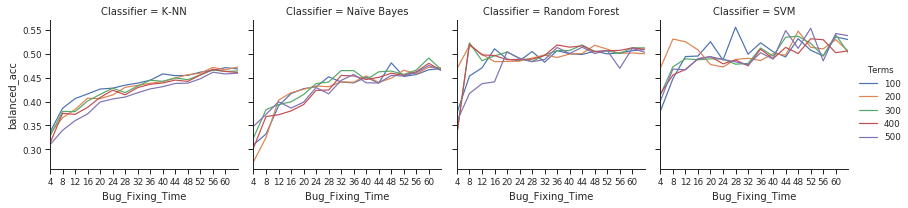

In [23]:
plot_line('winehq', results_winehq, 'Bug_Fixing_Time', 'balanced_acc', 'Terms', 'Classifier')